## CS 5242 Project, NUS 2020 Semester2

**Group Name: Team 2333**

**Group members:**
- Li Fengzi A0206468Y 
- Xiuping Hua A0206514N
- Shi Haohui A0206537E
- Jonathan Simon Wagner A0152784X

**Project address: https://www.kaggle.com/c/cs5242project/data**

- Data: I3D features, dimension is D=400
- Training videos: P16-P54
- Test videos: P03-P15
- Total 1712 videos
- Ground truth: frame-wise sub-action labels for each video. Dim = Ni*1 (total num of frames in video i, including 'SIL') 
- Splits:4 splits, split1 - test, train on other splits
- 48 different sub-actions including SIL (48 classes)
- 10 breakfast activities
- Each video contain Ni frames, various sub-actions, so various segments, thus various segment labels
- data_feat: I3D features for all training videos, dimension = Ni * D, Ni-frames, D=400
- data_labels: a list of all training labels, a list variable of length = the number of training segment for this video clip, i.e. segment labels, not the frame labels

- load data: template_code.py
- train_segment.txt: temporal segment boundaries for train dataset
- test_segment.txt: temporal segment boundaries for test dataset

## 1. Load libraries

In [0]:
%tensorflow_version 1.x
import tensorflow

TensorFlow 1.x selected.


In [0]:
# Load library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Mounted at google drive
from google.colab import drive
drive.mount('/content/gdrive')
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'CS5242'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!cat '/content/gdrive/My Drive/CS5242/read_datasetBreakfast.py'

In [0]:
# Update path to import from drive
import sys
sys.path.append('/content/gdrive/My Drive/CS5242')

## 2. Load data

In [0]:
from read_datasetBreakfast import load_data, read_mapping_dict
import os

COMP_PATH = 'content/gdrive/My Drive/CS5242/'

''' 
training to load train set
test to load test set
'''

train_split =  os.path.join(base_dir, 'splits/train.split1.bundle') #Train Split
test_split  =  os.path.join(base_dir, 'splits/test.split1.bundle') #Test Split
GT_folder   =  os.path.join(base_dir, 'groundTruth/groundTruth/') #Ground Truth Labels for each training video 
DATA_folder =  os.path.join(base_dir, 'data/') #Frame I3D features for all videos
mapping_loc =  os.path.join(base_dir, 'splits/mapping_bf.txt')

actions_dict = read_mapping_dict(mapping_loc)

data_feat, data_labels = load_data( train_split, actions_dict, GT_folder, DATA_folder, datatype = 'training') #Get features and labels
data_feat_test = load_data( test_split, actions_dict, GT_folder, DATA_folder, datatype = 'test') #Get features only

'''
Write Code Below
Pointers
Need to load the segments.txt file for segments for test videos 
Output the CSV in correct format as shown in Evaluation Section
Id corresponds to the segments in order. 
Example - 30-150 = Id 0
          150-428 = Id 1
          428-575 = Id 2
Category is the Class of the Predicted Action
'''

Finish Load the Training data and labels!!!


'\nWrite Code Below\nPointers\nNeed to load the segments.txt file for segments for test videos \nOutput the CSV in correct format as shown in Evaluation Section\nId corresponds to the segments in order. \nExample - 30-150 = Id 0\n          150-428 = Id 1\n          428-575 = Id 2\nCategory is the Class of the Predicted Action\n'

In [0]:
print('Number of training videos:', len(data_feat), '; Number of training segment labels: ',len(data_labels))
print('Number of test videos: ', len(data_feat_test))

Number of training videos: 1460 ; Number of training segment labels:  1460
Number of test videos:  252


In [0]:
labels = pd.DataFrame(data_labels)

labels = pd.DataFrame(labels.unstack(level=0)).reset_index()
labels.drop('level_0',inplace=True,axis=1)
labels.dropna(inplace=True)
labels.columns =['number','category']
labels['category'] = labels['category'].astype(int)


#mapping for actions (change keys and values)
actions_dict = {y:x for x,y in actions_dict.items()}
labels['category'] = labels['category'].map(actions_dict)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


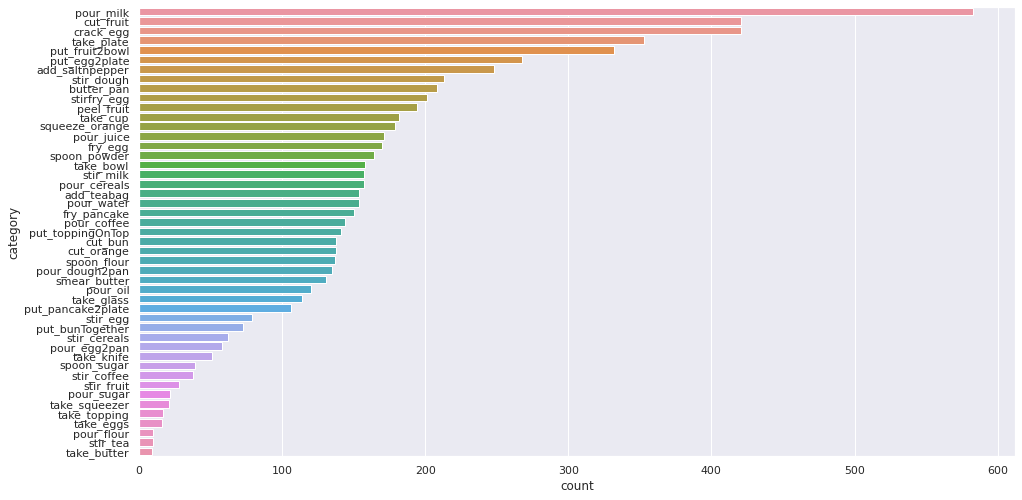

In [0]:
import seaborn as sns
import pandas_profiling
%matplotlib inline

sns.set(rc={'figure.figsize':(15.7,8.27)})

sns.countplot(y= 'category',orient= 'h',data=labels,order = labels['category'].value_counts().index)
plt.show()

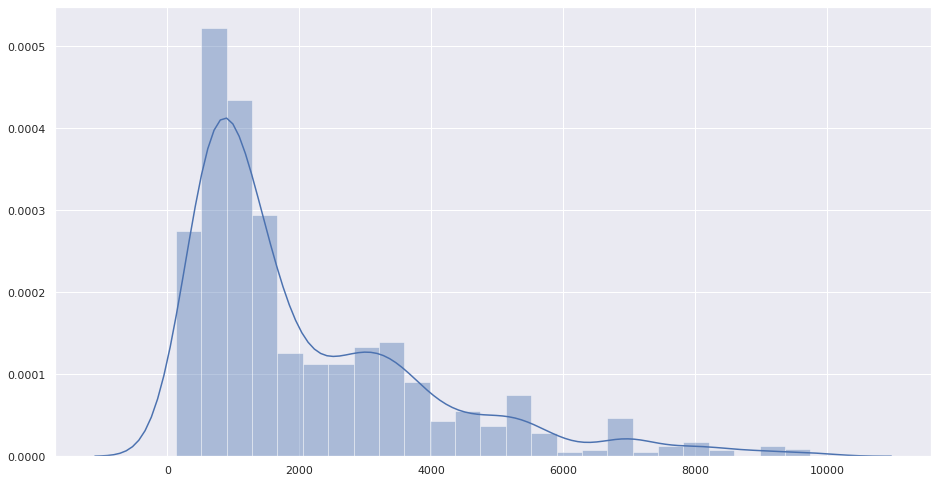

In [0]:
list_frame_no=[]
for x in data_feat:
    len_frame = len(x)
    list_frame_no.append(len_frame)
sns.distplot(list_frame_no)

In [0]:
# Shape of the first data_feat shape and number of segment labels
print('I3D feature dimension of the first video: ', data_feat[0].shape)
print('Sub-action segment labels of the first video: ', data_labels[0])

I3D feature dimension of the first video:  torch.Size([544, 400])
Sub-action segment labels of the first video:  [1, 2]


In [0]:
# Convert segment classes into list
file_class = open("/content/gdrive/My Drive/CS5242/splits/mapping_bf.txt", "r")
class_list = [line.split('\n') for line in file_class.readlines()]

file_train = open("/content/gdrive/My Drive/CS5242/training_segment.txt", "r")
train_segments = [line.split('\n') for line in file_train.readlines()]

train_segment_list = []
for i in range(len(train_segments)):
  train_segment_list.append(train_segments[i][0])

train_seg = [segment_line.split(' ') for segment_line in train_segment_list]

# Change the string format into int
train_seg_new = []
for i in train_seg:
  seg = []
  for j in i:
    seg.append(int(j))
  train_seg_new.append(seg)
print(train_seg_new[0:5])

[[9, 269, 474], [48, 376, 637, 1270, 5506, 6799, 6871], [6, 56, 218, 583, 701, 997, 1106, 1628, 1761, 2067, 2166], [23, 313, 478, 618, 743], [15, 260, 440, 714, 1276, 1340, 1866, 2067, 7475, 7551, 7930]]


In [0]:
print('Number of train videos: ',len(data_feat), '; Number of segment lists: ', len(train_seg_new))

Number of train videos:  1460 ; Number of segment lists:  1460


## 3. Feature extraction by max pooling

In [0]:
from read_datasetBreakfast import get_maxpool_lstm_data
data_feat_max = []
for i in range(len(data_feat)):
   list_data = get_maxpool_lstm_data(data_feat[i],train_seg_new[i])
   data_feat_max.append(list_data)

In [0]:
# Check whether the feature dimension changes
# Original dimension
print(data_feat[0].shape)
# New dimension
print(data_feat_max[0].shape)

torch.Size([544, 400])
torch.Size([2, 400])


In [0]:
# Find the max number of segments in one video
train_seg = []
for k in data_feat_max:
  train_seg.append(len(k))
print('The max number of segments is :', max(train_seg))

The max number of segments is : 23


In [0]:
# Make each video contain 28 segments through padding
from keras.preprocessing import sequence
from keras.utils import to_categorical
data_feat_pad= sequence.pad_sequences(data_feat_max, maxlen=28, padding='post', truncating='post', value=0.0, dtype='float64')
data_labels_pad = sequence.pad_sequences(data_labels, maxlen=28, padding='post', truncating='post', value=0)
data_labels_pad = [to_categorical(i, 48) for i in data_labels_pad]
data_feat_pad = np.array(data_feat_pad)
data_labels_pad = np.array(data_labels_pad)

Using TensorFlow backend.


In [0]:
# Train, validation and test dataset split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, Y_test = train_test_split(data_feat_pad, data_labels_pad, test_size = 0.2, random_state = 5242)
x_val, x_test, y_val, y_test = train_test_split(X_test, Y_test, test_size = 0.5, random_state = 5242)
print(len(X_train), len(y_train))
print(len(x_val), len(y_val))
print(len(x_test), len(y_test))

1168 1168
146 146
146 146


In [0]:
# Delete data_feat to save ram
del data_feat

## 4. Models
### 4.1 Multi-layer LSTM model

In [0]:
from keras.layers import Dense, Flatten, Dropout, Bidirectional, MaxPooling1D, TimeDistributed, GRU, Conv1D
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model
from keras.optimizers import Adam
from keras import backend

In [0]:
# Build Multi-layer LSTM model
seg_class = 48 # Padding is used so silence is included —— 48 classes

lstm_model = Sequential()
lstm_model.add(LSTM(2048, return_sequences= True, dropout = 0.1, input_shape = data_feat_pad[0].shape))
lstm_model.add(Dense(1024, activation='relu'))
lstm_model.add(Dense(256, activation='relu'))
lstm_model.add(Dense(128, activation='relu'))
lstm_model.add(Dropout(0.1))
lstm_model.add(Dense(seg_class, activation='softmax'))
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(lstm_model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 28, 2048)          20062208  
_________________________________________________________________
dense_28 (Dense)             (None, 28, 1024)          2098176   
_________________________________________________________________
dense_29 (Dense)             (None, 28, 256)           262400    
_________________________________________________________________
dense_30 (Dense)             (None, 28, 128)           32896     
_________________________________________________________________
dropout_9 (Dropout)          (None, 28, 128)           0         
_________________________________________________________________
dense_31 (Dense)             (None, 28, 48)            6192      
Total params: 22,461,872
Trainable params: 22,461,872
Non-trainable params: 0
_________________________________________

### 4.2 CNN LSTM model 

In [0]:
# Build CNN LSTM model
cnn_lstm_model = Sequential()
cnn_lstm_model.add(Conv1D(32,kernel_size=3,padding='same',activation='relu',strides=1,input_shape = data_feat_pad[0].shape))
cnn_lstm_model.add(MaxPooling1D(pool_size=2, strides=1, padding='same'))
cnn_lstm_model.add(Dropout(0.2))
cnn_lstm_model.add(LSTM(2048, return_sequences= True, dropout = 0.1))
cnn_lstm_model.add(Dense(1024, activation='relu'))
cnn_lstm_model.add(Dense(256, activation='relu'))
cnn_lstm_model.add(Dense(128, activation='relu'))
cnn_lstm_model.add(Dropout(0.1))
cnn_lstm_model.add(Dense(seg_class, activation='softmax'))
cnn_lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(cnn_lstm_model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 28, 32)            38432     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 28, 32)            0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 28, 32)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 28, 2048)          17047552  
_________________________________________________________________
dense_32 (Dense)             (None, 28, 1024)          2098176   
_________________________________________________________________
dense_33 (Dense)             (None, 28, 256)           262400    
_________________________________________________________________
dense_34 (Dense)             (None, 28, 128)         

### 4.3 Bi-Directional GRU model 

In [0]:
# Build Bi-Directional GRU model 
bi_gru_model = Sequential()
bi_gru_model.add(Bidirectional(GRU(1024, dropout=0.08, return_sequences=True), merge_mode='concat' ,input_shape= data_feat_pad[0].shape))
bi_gru_model.add(Bidirectional(GRU(1024, dropout=0.08, return_sequences=True), merge_mode='concat')) 
bi_gru_model.add(TimeDistributed(Dense(seg_class, activation='softmax'))) 
bi_gru_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(bi_gru_model.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_7 (Bidirection (None, 28, 2048)          8755200   
_________________________________________________________________
bidirectional_8 (Bidirection (None, 28, 2048)          18880512  
_________________________________________________________________
time_distributed_4 (TimeDist (None, 28, 48)            98352     
Total params: 27,734,064
Trainable params: 27,734,064
Non-trainable params: 0
_________________________________________________________________
None


### 4.4 Bi-Directional LSTM model 

In [0]:
# Build Bi-Directional LSTM model 
bi_lstm_model = Sequential()
bi_lstm_model.add(Bidirectional(LSTM(1024, dropout=0.08, return_sequences=True), merge_mode='sum', input_shape=data_feat_pad[0].shape)) 
bi_lstm_model.add(Bidirectional(LSTM(1024, dropout=0.08, return_sequences=True), merge_mode='sum'))
bi_lstm_model.add(TimeDistributed(Dense(seg_class, activation='softmax')))
bi_lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
bi_lstm_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_9 (Bidirection (None, 28, 1024)          11673600  
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 28, 1024)          16785408  
_________________________________________________________________
time_distributed_5 (TimeDist (None, 28, 48)            49200     
Total params: 28,508,208
Trainable params: 28,508,208
Non-trainable params: 0
_________________________________________________________________


## 5.  Model Training and Evaluation

### 5.1 LSTM Model

In [0]:
import time
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [0]:
start = time.time()
history = lstm_model.fit(X_train, y_train, batch_size=400, epochs=300, verbose=1, shuffle=False, validation_data=(x_val, y_val), callbacks=[earlyStopping, reduce_lr_loss])
elapsed = time.time() - start
print('Computation time = ' + str(round(elapsed,2)) + 's')

### 5.2 CNN LSTM Model

In [0]:
history_cnn_lstm = cnn_lstm_model.fit(X_train, y_train, batch_size=400, epochs=200, verbose=1, shuffle=False, validation_data=(x_val, y_val), callbacks=[earlyStopping, reduce_lr_loss]) 

### 5.3 Bi-directional GRU model

In [0]:
history_bi_gru = bi_gru_model.fit(X_train, y_train, batch_size=400, epochs=200, verbose=1, shuffle=False, validation_data=(x_val, y_val), callbacks=[earlyStopping, reduce_lr_loss]) 

### 5.4 Bi-directional LSTM model

In [0]:
history_bi_lstm = bi_lstm_model.fit(X_train, y_train, batch_size=400, epochs=200, verbose=1, shuffle=False, validation_data=(x_val, y_val), callbacks=[earlyStopping, reduce_lr_loss])

###5.5 Model Evaluation

In [0]:
# Prediction
test_pred_lstm = lstm_model.predict(x_test)
test_pred_cnn_lstm = cnn_lstm_model.predict(x_test)
test_pred_bi_gru = bi_gru_model.predict(x_test)
test_pred_bi_lstm = bi_lstm_model.predict(x_test)

In [0]:
# Define get_label function to change probability result into class
def get_label(list_1):
  list_2 = []
  for i in list_1:
    for j in i:
      x = np.argmax(j)
      if x == 0:
        continue
      else:
        list_2.append(x)
  return list_2

In [0]:
# Check the length of label list
label_test_pred_lstm = get_label(test_pred_lstm)
label_test_pred_cnn_lstm = get_label(test_pred_cnn_lstm)
label_test_pred_bi_gru = get_label(test_pred_bi_gru)
label_test_pred_bi_lstm = get_label(test_pred_bi_lstm)
print('Multi-layer LSTM Model: ', len(label_test_pred_lstm))
print('CNN-LSTM Model: ', len(label_test_pred_cnn_lstm))
print('Bi-directional GRU Model: ', len(label_test_pred_bi_gru))
print('Bi-directional LSTM Model: ', len(label_test_pred_bi_lstm))

Multi-layer LSTM Model:  703
CNN-LSTM Model:  703
Bi-directional GRU Model:  703
Bi-directional LSTM Model:  703


In [0]:
# Accuracy
from sklearn.metrics import accuracy_score
label_test_true = get_label(y_test)
print('Test accuracy of Multi-layer LSTM Model: ', accuracy_score(label_test_pred_lstm, label_test_true))
print('Test accuracy of CNN-LSTM Model: ', accuracy_score(label_test_pred_cnn_lstm, label_test_true))
print('Test accuracy of Bi-directional GRU Model: ', accuracy_score(label_test_pred_bi_gru, label_test_true)) 
print('Test accuracy of Bi-directional LSTM Model: ', accuracy_score(label_test_pred_bi_lstm, label_test_true)) 

Test accuracy of Multi-layer LSTM Model:  0.6614509246088194
Test accuracy of CNN-LSTM Model:  0.6529160739687055
Test accuracy of Bi-directional GRU Model:  0.8975817923186344
Test accuracy of Bi-directional LSTM Model:  0.9018492176386913


In [0]:
file_class = pd.read_csv("/content/gdrive/My Drive/CS5242/splits/mapping_bf.txt", sep = ' ', header = None, names = ['label','truth'])
dict_class = file_class.set_index('label').T.to_dict('list')

# Classification report of Bi-directional GRU Model
from sklearn.metrics import classification_report
class_names = file_class.truth.to_list()
for i in list(set(list(range(0,48))).difference(set(label_test_true))):
  if dict_class[i][0] in class_names:
    class_names.remove(dict_class[i][0])
print(classification_report(label_test_true, label_test_pred_bi_gru, target_names=class_names))

45
                   precision    recall  f1-score   support

     pour_cereals       0.85      0.92      0.88        12
        pour_milk       0.83      0.93      0.88        57
     stir_cereals       0.71      1.00      0.83         5
        take_bowl       0.93      0.93      0.93        14
      pour_coffee       0.83      1.00      0.91        10
         take_cup       0.94      1.00      0.97        17
      spoon_sugar       0.50      1.00      0.67         1
      stir_coffee       1.00      1.00      1.00         2
       pour_sugar       0.00      0.00      0.00         1
         pour_oil       1.00      0.93      0.96        14
        crack_egg       0.82      0.89      0.85        45
  add_saltnpepper       0.75      0.90      0.82        20
          fry_egg       0.87      0.91      0.89        22
       take_plate       0.86      0.89      0.87        27
    put_egg2plate       0.97      1.00      0.98        28
        take_eggs       1.00      0.33      0.50    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
# Classification report of Bi-directional LSTM Model
print(classification_report(label_test_true, label_test_pred_bi_lstm, target_names=class_names))

                   precision    recall  f1-score   support

     pour_cereals       0.75      1.00      0.86        12
        pour_milk       0.89      0.84      0.86        57
     stir_cereals       0.62      1.00      0.77         5
        take_bowl       0.75      0.86      0.80        14
      pour_coffee       0.91      1.00      0.95        10
         take_cup       0.82      0.82      0.82        17
      spoon_sugar       1.00      1.00      1.00         1
      stir_coffee       1.00      1.00      1.00         2
       pour_sugar       1.00      1.00      1.00         1
         pour_oil       0.85      0.79      0.81        14
        crack_egg       0.85      0.87      0.86        45
  add_saltnpepper       0.80      0.80      0.80        20
          fry_egg       0.88      1.00      0.94        22
       take_plate       0.89      0.89      0.89        27
    put_egg2plate       0.97      1.00      0.98        28
        take_eggs       0.00      0.00      0.00       

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 6. Prediction of Testset and Kaggle Submission

###6.1 Re-build and train models

In [0]:
# Re-build two models and use the whole dataset to train
# Build Bi-Directional GRU model 
seg_class = 48 
bi_gru_model = Sequential()
bi_gru_model.add(Bidirectional(GRU(1024, dropout=0.08, return_sequences=True), merge_mode='concat' ,input_shape= data_feat_pad[0].shape))
bi_gru_model.add(Bidirectional(GRU(1024, dropout=0.08, return_sequences=True), merge_mode='concat')) 
bi_gru_model.add(TimeDistributed(Dense(seg_class, activation='softmax'))) 
bi_gru_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Build Bi-Directional LSTM model 
bi_lstm_model = Sequential()
bi_lstm_model.add(Bidirectional(LSTM(1024, dropout=0.08, return_sequences=True), merge_mode='sum', input_shape=data_feat_pad[0].shape)) 
bi_lstm_model.add(Bidirectional(LSTM(1024, dropout=0.08, return_sequences=True), merge_mode='sum'))
bi_lstm_model.add(TimeDistributed(Dense(seg_class, activation='softmax')))
bi_lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
earlyStopping = EarlyStopping(monitor='loss', patience=10, verbose=0, mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [0]:
# Train two models and use earlystopping and learning rate adjustment to avoid overfitting
history_bi_gru = bi_gru_model.fit(data_feat_pad, data_labels_pad, batch_size=400, epochs=150, verbose=0, shuffle=False, callbacks=[earlyStopping, reduce_lr_loss]) 


Epoch 00127: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00137: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00144: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.


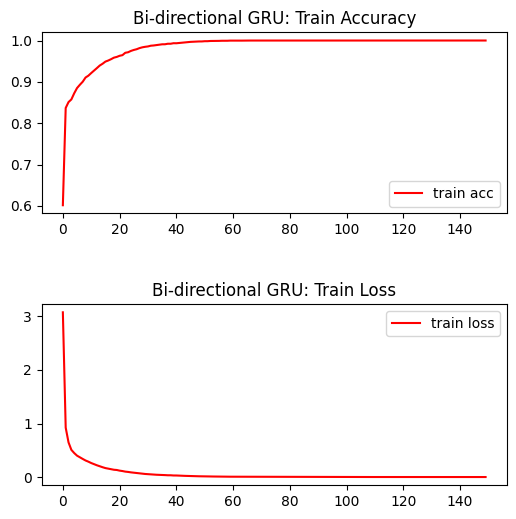

In [0]:
# Plot train and valid loss history of Bi-directional GRU model
loss_gru = history_bi_gru.history['loss']
acc_gru = history_bi_gru.history['accuracy']

epoch_number = range(len(acc_gru))
plt.figure(figsize=(6, 6), dpi=100)
plt.subplot(2,1,1)
plt.plot(epoch_number, acc_gru, 'r', label='train acc')
plt.title('Bi-directional GRU: Train Accuracy')
plt.legend()
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,1,2)
plt.plot(epoch_number, loss_gru, 'r', label='train loss')
plt.title('Bi-directional GRU: Train Loss')
plt.legend()

plt.show()

In [0]:
history_bi_lstm = bi_lstm_model.fit(data_feat_pad, data_labels_pad, batch_size=400, epochs=150, verbose=0, shuffle=False, callbacks=[earlyStopping, reduce_lr_loss]) 


Epoch 00127: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00137: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00144: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.


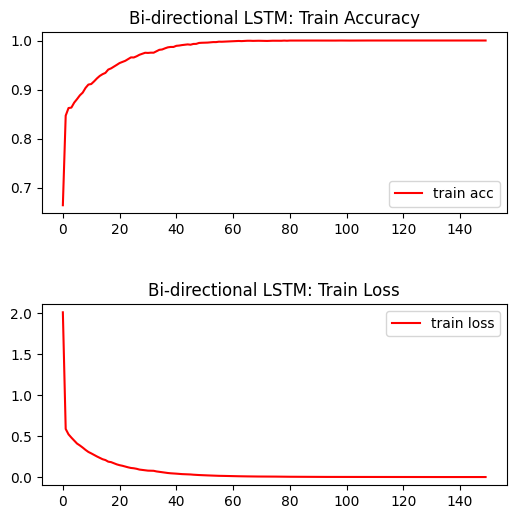

In [0]:
# Plot train and valid loss history of Bi-directional LSTM model
loss_lstm = history_bi_lstm.history['loss']
acc_lstm = history_bi_lstm.history['accuracy']

epoch_number = range(len(acc_lstm))
plt.figure(figsize=(6, 6), dpi=100)
plt.subplot(2,1,1)
plt.plot(epoch_number, acc_lstm, 'r', label='train acc')
plt.title('Bi-directional LSTM: Train Accuracy')
plt.legend()
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,1,2)
plt.plot(epoch_number, loss_lstm, 'r', label='train loss')
plt.title('Bi-directional LSTM: Train Loss')
plt.legend()

plt.show()

In [0]:
# Sava Models
lstm_model.save('best_bi_lstm.h5')
bi_gru_model.save('best_bi_gru.h5')
!cp best_bi_lstm.h5 "/content/gdrive/My Drive/"
!cp best_bi_gru.h5 "/content/gdrive/My Drive/"

###6.2 Pre-processing of Testset

In [0]:
# Get test segments 
def data_seg(file_path):
  data_segment_list = []
  data_segments = [line.split('\n') for line in file_path.readlines()]
  
  for i in range(len(data_segments)):
    data_segment_list.append(data_segments[i][0])
  
  data_seg = [segment_line.split(' ') for segment_line in data_segment_list]
  return data_seg

file_test = open("/content/gdrive/My Drive/CS5242/test_segment.txt", "r")
test_seg = data_seg(file_test)

test_seg_new = []
for i in test_seg:
  seg = []
  for j in i:
    seg.append(int(j))
  test_seg_new.append(seg)
  
print(test_seg_new[0:5])
print(len(test_seg_new))

[[30, 150, 428, 575, 705], [38, 199, 378, 775], [385, 599, 1382, 4007, 4123], [54, 229, 514, 754, 1024], [483, 548, 703, 853, 2633, 2960, 3310, 3740, 4110, 4200, 4375]]
252


In [0]:
# Test set feature extraction by Max Pooling
data_feat_test_max = []
for i in range(len(data_feat_test)):
  list_data = get_maxpool_lstm_data(data_feat_test[i],test_seg_new[i])
  data_feat_test_max.append(list_data)

In [0]:
# Find the max number of test segments in one video
test_seg = []
for k in data_feat_test_max:
  test_seg.append(len(k))
print('The max number of test segments is: ', max(test_seg))

The max number of test segments is:  16


In [0]:
# Padding
data_feat_test_pad= sequence.pad_sequences(data_feat_test_max, maxlen=28, padding='post', truncating='post', value=0.0, dtype='float64')
data_feat_test_pad = np.array(data_feat_test_pad)

###6.3 Prediction and submission

In [0]:
# Prediction
test_pred_bi_gru = bi_gru_model.predict(data_feat_test_pad)
test_pred_bi_lstm = bi_lstm_model.predict(data_feat_test_pad)

# Ensemble Model
test_ensemble = test_pred_bi_gru + test_pred_bi_lstm

In [0]:
# Check the length of predicted labels
label_test_pred_bi_gru = get_label(test_pred_bi_gru)
label_test_pred_bi_lstm = get_label(test_pred_bi_lstm)

print('Bi-directional GRU Model: ', len(label_test_pred_bi_gru))
print('Bi-directional LSTM Model: ', len(label_test_pred_bi_lstm))

label_test_pred_ensemble = get_label(test_ensemble)

Bi-directional GRU Model:  1284
Bi-directional LSTM Model:  1284


In [0]:
# Covert predicted labels to csv
test_csv = pd.DataFrame(columns=['Category'])
test_csv['Category'] = label_test_pred_ensemble
test_csv = test_csv.rename_axis('Id').reset_index()
test_csv

,Id,Category
0,0,4
1,1,1
2,2,2
3,3,3
4,4,6
...,...,...
1279,1279,44
1280,1280,14
1281,1281,15
1282,1282,45


In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')
test_csv.to_csv('cs5242_GP_test_ensemble.csv', index=False)
!cp cs5242_GP_test_ensemble.csv "/content/gdrive/My Drive/"

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


### References:
[1] five-video-classification-methods:

github: https://github.com/harvitronix/five-video-classification-methods

blog: https://blog.coast.ai/five-video-classification-methods-implemented-in-keras-and-tensorflow-99cad29cc0b5

[2] When can Validation Accuracy be greater than Training Accuracy for Deep Learning Models?

https://www.researchgate.net/post/When_can_Validation_Accuracy_be_greater_than_Training_Accuracy_for_Deep_Learning_Models